In [2]:
%cd ..

/Users/mateoibarguen/Desktop/DATA-Capstone


In [7]:
from keras.models import load_model
from keras.layers import BatchNormalization, Bidirectional, LSTM, Dropout, Dense
from keras.models import Sequential
from models.networks.abstract_models.attention import Attention
from models.networks.abstract_models.base_model import BaseModel
from models.spectra_preprocessor import SpectraPreprocessor
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [8]:
spectra_pp = SpectraPreprocessor(dataset_name='set_01', use_generator=False)
X_train, y_train, X_test, y_test = spectra_pp.transform(encoded=True)

In [11]:
class LSTModel1(BaseModel):

    def build_model(self, num_channels, num_timesteps, output_shape):
        model = Sequential()
        model.add(BatchNormalization(momentum=0.98, input_shape=(num_timesteps, num_channels)))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Bidirectional(LSTM(128, return_sequences=True)))
        model.add(Attention(num_timesteps))
        model.add(Dropout(.5))
        model.add(Dense(500, activation='elu'))
        model.add(Dropout(.5))
        model.add(Dense(output_shape, activation='softmax'))

        return model

In [10]:
lstm_model.keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1001, 10)          40        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1001, 256)         142336    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1001, 256)         394240    
_________________________________________________________________
attention_1 (Attention)      (None, 256)               1257      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               128500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [72]:
preds = lstm_model.keras_model.predict(X_test)

In [74]:
pred_n = [np.argmax(s) + 1 for s in preds]
y_true = [np.argmax(s) + 1 for s in y_test]

In [75]:
print(classification_report(y_true, pred_n))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       302
           2       0.91      0.97      0.94       305
           3       0.82      0.84      0.83       304
           4       0.63      0.65      0.64       282
           5       0.81      0.71      0.76       307

    accuracy                           0.84      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.84      0.84      0.84      1500



In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
loss = lstm_model.history['loss']
val_loss = lstm_model.history['val_loss']

In [59]:
def plot_metric(metric):
    training = lstm_model.history[metric]
    val = lstm_model.history[f'val_{metric}']
    plt.plot(training)
    plt.plot(val)
    plt.legend([f'Training {metric}', f'Validation {metric}'])
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'{metric} per epoch')
    plt.show()

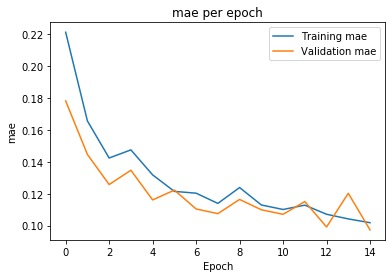

In [63]:
plot_metric('mae')

In [67]:
accuracy_score(y_true, pred_n)

0.5986666666666667

In [21]:
pred_n = [np.argmax(s) + 1 for s in preds]
y_true = [np.argmax(s) + 1 for s in y_test]

In [80]:
cnf_matrix = confusion_matrix(y_true, pred_n)

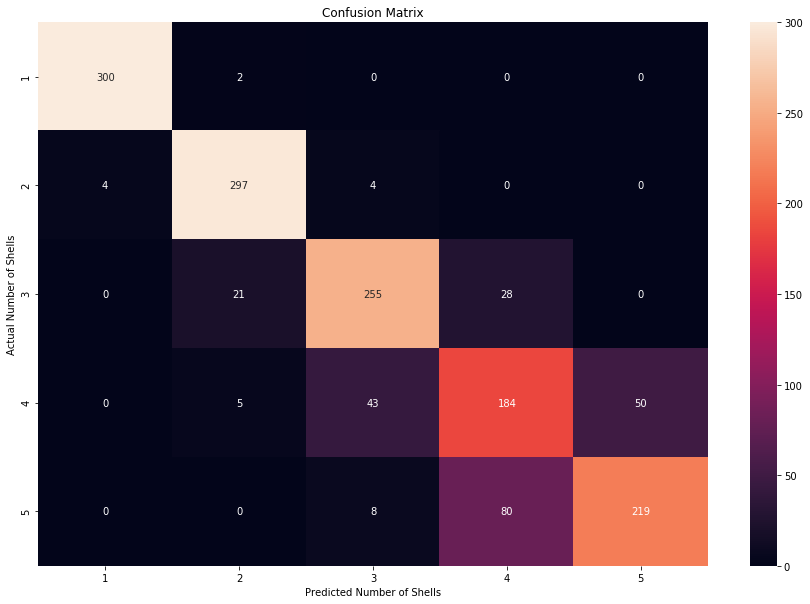

In [111]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cnf_matrix, annot=True, ax=ax,  fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Number of Shells')
ax.set_ylabel('Actual Number of Shells')
ax.xaxis.set_ticklabels([i for i in range(1, 6)]); 
ax.yaxis.set_ticklabels([i for i in range(1, 6)]);
plt.show()